<a href="https://colab.research.google.com/github/Mohamedragih1/Multi-class-Classification-on-Iris-Dataset/blob/main/Multi_class_Classification_using_PyTorch_on_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import torch.nn.functional as F


In [112]:
# Load dataset
iris = pd.read_csv('iris.csv')
display(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [113]:
X = iris.drop('species', axis = 1)
y = iris['species']
display(X)
display(y)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [114]:
y = pd.get_dummies(y, columns=['species']).astype(int)

In [115]:
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [116]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)
X

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [117]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [118]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)


In [119]:
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)


In [120]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 3)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)
        return x

In [121]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [122]:
import torch

# Training the model
epochs = 200
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


for epoch in range(epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)

        labels = torch.argmax(labels, dim=1)

        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)

            # Convert one-hot encoded labels back to class indices for validation
            labels = torch.argmax(labels, dim=1)

            # Calculate loss
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, "
          f"Train Loss: {running_loss/len(train_loader):.4f}, "
          f"Train Accuracy: {train_accuracy:.2f}%, "
          f"Val Loss: {val_loss/len(val_loader):.4f}, "
          f"Val Accuracy: {val_accuracy:.2f}%")

Epoch 1/200, Train Loss: 1.0988, Train Accuracy: 33.33%, Val Loss: 1.0877, Val Accuracy: 33.33%
Epoch 2/200, Train Loss: 1.0947, Train Accuracy: 33.33%, Val Loss: 1.0853, Val Accuracy: 33.33%
Epoch 3/200, Train Loss: 1.0903, Train Accuracy: 33.33%, Val Loss: 1.0801, Val Accuracy: 40.00%
Epoch 4/200, Train Loss: 1.0836, Train Accuracy: 43.33%, Val Loss: 1.0717, Val Accuracy: 73.33%
Epoch 5/200, Train Loss: 1.0717, Train Accuracy: 60.83%, Val Loss: 1.0591, Val Accuracy: 80.00%
Epoch 6/200, Train Loss: 1.0567, Train Accuracy: 65.00%, Val Loss: 1.0410, Val Accuracy: 80.00%
Epoch 7/200, Train Loss: 1.0360, Train Accuracy: 70.83%, Val Loss: 1.0170, Val Accuracy: 46.67%
Epoch 8/200, Train Loss: 1.0068, Train Accuracy: 59.17%, Val Loss: 0.9813, Val Accuracy: 46.67%
Epoch 9/200, Train Loss: 0.9539, Train Accuracy: 62.50%, Val Loss: 0.9296, Val Accuracy: 46.67%
Epoch 10/200, Train Loss: 0.8964, Train Accuracy: 63.33%, Val Loss: 0.8595, Val Accuracy: 53.33%
Epoch 11/200, Train Loss: 0.8130, Train

In [123]:
# Calculate accuracy on the validation set
model.eval()
correct_test = 0
total_test = 0
test_losses = []
test_loss = 0
test_accuracies = []
with torch.no_grad():
  for inputs, labels in test_loader:
    outputs = model(inputs)

    labels = torch.argmax(labels, dim=1)

    loss = criterion(outputs, labels)
    test_loss += loss.item()

    _, predicted = torch.max(outputs, 1)
    total_test += labels.size(0)
    correct_test += (predicted == labels).sum().item()

test_accuracy = 100 * correct_test / total_test
test_losses.append(val_loss / len(test_loader))
test_accuracies.append(val_accuracy)
print(f"Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 0.0468, Test Accuracy: 100.00%


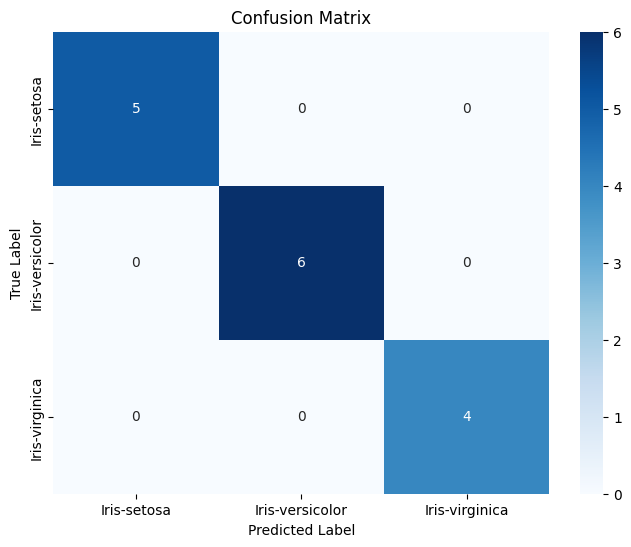

In [125]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        labels = torch.argmax(labels, dim=1)

        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


In [126]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       1.00      1.00      1.00         4

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15



<ipython-input-127-787915d6f410>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_scores = model(torch.tensor(X_val, dtype=torch.float32)).detach().numpy()


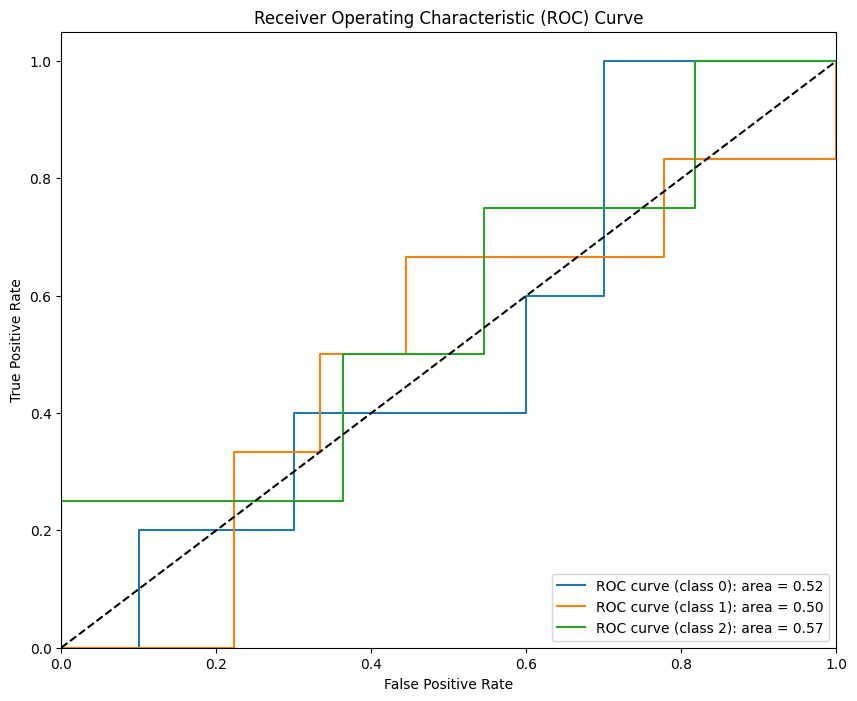

In [127]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_true_binarized = label_binarize(y_true, classes=[0, 1, 2])
n_classes = y_true_binarized.shape[1]


y_scores = model(torch.tensor(X_val, dtype=torch.float32)).detach().numpy()
y_scores = torch.softmax(torch.tensor(y_scores), dim=1).numpy()


plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}): area = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


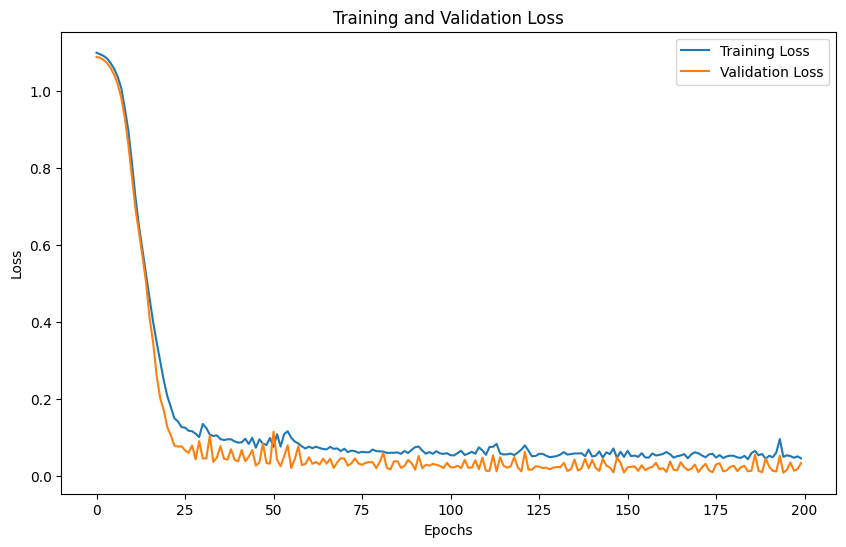

In [128]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
